<a href="https://colab.research.google.com/github/dgscharan/Computer_vision/blob/main/grid_captcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,244 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!pip install easyocr

     |████████████████████████████████| 48.9MB 62kB/s 


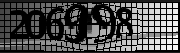

In [ ]:
img = cv2.imread('./captcha1 (1).png', 0)
cv2_imshow(img)

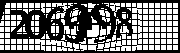

In [ ]:
ret,thresh1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

In [ ]:
img_bin = 255-thresh1



kernel_length = np.array(thresh1).shape[1]//80
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

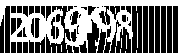

In [ ]:
vert_struct = cv2.erode(img_bin, vertical_kernel, iterations=3)
vert_img = cv2.dilate(vert_struct, vertical_kernel, iterations=3)
cv2_imshow(vert_img)

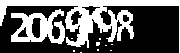

In [ ]:
horiz_struct = cv2.erode(vert_img, horizontal_kernel, iterations=1)
horiz_img = cv2.dilate(horiz_struct, horizontal_kernel, iterations=1)
cv2_imshow(horiz_img)

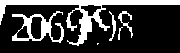

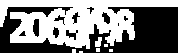

In [ ]:
kernel = np.ones((3,3), np.uint8) 
img_erosion = cv2.erode(horiz_img, kernel, iterations=1) 
img_dilation = cv2.dilate(horiz_img, kernel, iterations=1)

cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

In [ ]:
import pytesseract

txt = pytesseract.image_to_string(img_erosion)
txt

'\x0c'

In [ ]:
import easyocr 
reader = easyocr.Reader(['en'])
bounds = reader.readtext(img_erosion, detail=0, paragraph=True)
print(bounds)

['2059{)8']
